In [69]:
from gensim import models

file_f = open('D:/tugas-akhir/fnc-id/corpus/crossval/fakta_stopstemset3.txt').read()
file_h = open('D:/tugas-akhir/fnc-id/corpus/crossval/hoax_stopstemset3.txt').read()

list_f = file_f.split()
list_h = file_h.split()

sentence = models.doc2vec.LabeledSentence(
    words=list_f, tags=["SENT_fakta"])
sentence1 = models.doc2vec.LabeledSentence(
    words=list_h, tags=["SENT_hoax"])

sentences = [sentence, sentence1]
token_count = sum([len(sentence) for sentence in sentences])

class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])
            
model = models.Doc2Vec(dm=0, alpha=.025, min_alpha=.025, min_count=1)
model.build_vocab(sentences)


for epoch in range(10):
    model.train( sentences, total_examples = token_count, epochs = model.iter)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay
   

model.save("my_model.doc2vec")
model_loaded = models.Doc2Vec.load('my_model.doc2vec')


#print(model.docvecs.most_similar(["SENT_hoax"])[0][1])
#print(model.docvecs.most_similar(["SENT_fakta"]))
#print(model_loaded.docvecs.most_similar(["SENT_hoax"]))
print(model.docvecs["SENT_hoax"])

#word_vec = model['pesan']
#model.docvecs.most_similar([word_vec])
#print("fakta")
#print(model.docvecs["SENT_fakta"])


[ 0.01896182 -0.25047845 -1.39092791  0.46481359 -0.53272218  0.10240473
  0.90694594  0.22021167  0.77287608 -0.45324469  0.77404207  1.14541972
  0.78980905 -0.01917335 -0.86842477  0.9939397   0.83157557  0.25214306
  0.193737   -0.5815255  -0.62548518  1.04272306 -0.07915713 -0.4304654
 -0.22243063 -0.48936519 -0.08371028 -0.00985503 -0.5537293  -0.02165492
 -0.89110988 -0.0056865  -0.3958219  -0.93191075 -0.24546857  1.15999198
  0.71873057 -0.01472969  0.68418044 -0.14829805 -0.35111248 -0.22981597
  0.81975323 -0.71578431  0.00774738 -0.23844212  0.71652681 -0.76715106
 -0.09710501  0.23470064 -0.09623706  0.30152789 -0.91514385 -0.81076276
  0.24933815 -0.61931956 -0.06924748  1.16104889 -0.03828844 -0.33128202
 -0.17996764  1.22720993 -1.18097699 -0.10945787  0.26582795  0.64392352
  0.299575   -0.69656253  0.28652003  0.30364418  0.1783399   0.6456421
  0.80055821  0.22383897 -0.56433845 -0.04656903 -0.45470369  0.01960577
  0.26736024  0.27723736  0.44050366  0.36166343  0.0

In [70]:
print(model.docvecs.most_similar(["SENT_hoax"]))

[('SENT_fakta', 0.1411222368478775)]


In [71]:
import numpy as np
new_mat = np.vstack((model.docvecs["SENT_hoax"], model.docvecs["SENT_fakta"]))
np.shape(new_mat)

(2L, 100L)

In [72]:
from sklearn.preprocessing import StandardScaler
x_new = StandardScaler().fit_transform(new_mat)


In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [74]:
new_pca = pca.transform(x_new)
print("original shape:   ", new_mat.shape)
print("transformed shape:", new_pca.shape)

x = np.stack((new_pca[0][0], new_pca[1][0]))
y = np.stack((new_pca[0][1], new_pca[1][1]))

new_pca

('original shape:   ', (2L, 100L))
('transformed shape:', (2L, 2L))


array([[  1.00000000e+01,   5.06300372e-17],
       [ -1.00000000e+01,  -5.06300372e-17]])

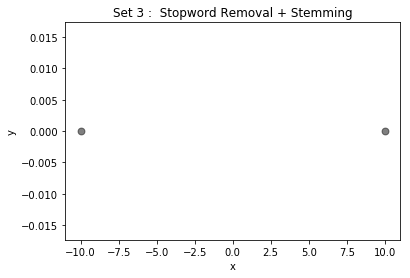

In [75]:
import matplotlib.pyplot as plt
N = 5
x = x
y = y
colors = (0,0,0)
area = np.pi*15
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Set 3 :  Stopword Removal + Stemming')
plt.xlabel('x')
plt.ylabel('y')
plt.show()